In [3]:
import firebase_admin
import serial
from firebase_admin import db
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import json
import csv

In [4]:
databaseURL = 'https://truong-khang-thinh-nguyen-default-rtdb.firebaseio.com/'
cred_obj = firebase_admin.credentials.Certificate(
    'truong-khang-thinh-nguyen-firebase-adminsdk-mne9g-2ae8218f25.json'
)
default_app = firebase_admin.initialize_app(cred_obj, {
	'databaseURL':databaseURL
	})

In [5]:
ref = db.reference("/")

In [ ]:
# Set the baud rate
baud_rate = 9600

# Create a serial port communication
s = serial.Serial(port = "COM7", baudrate = baud_rate, timeout=20)

while True: 
    gyro_data = s.readline().decode("utf-8").strip()
    # Timestamp
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    gyro_x , gyro_y , gyro_z = gyro_data.split(",")
    # Send data to Firebase using push
    ref.push({
    "Timestamp" : timestamp ,
    "Gyro_X": gyro_x ,
    "Gyro_Y" : gyro_y ,
    "Gyro_Z" : gyro_z
    })

In [22]:
# Load JSON data from a file
with open('Task 5.1P.json', 'r') as file:
    data = json.load(file)

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(data, orient='index')

# Save the DataFrame to a CSV file
df.to_csv('gyro_data.csv', index=False)


In [50]:
# Load converted CSV file from JSON file
df = pd.read_csv("gyro_data.csv")
df

,Gyro_X,Gyro_Y,Gyro_Z,Timestamp
0,1.77,-0.37,0.55,2024-08-13 16:04:34
1,0.49,0.92,0.55,2024-08-13 16:04:35
2,0.24,0.55,0.55,2024-08-13 16:04:36
3,0.24,0.43,0.55,2024-08-13 16:04:37
4,0.12,0.37,0.55,2024-08-13 16:04:38
...,...,...,...,...
2820,0.31,0.37,0.61,2024-08-13 16:51:40
2821,0.37,0.37,0.55,2024-08-13 16:51:41
2822,-0.18,0.92,0.55,2024-08-13 16:51:42
2823,0.43,0.67,0.55,2024-08-13 16:51:43


In [51]:
# Check null valuesdf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gyro_X     2825 non-null   float64
 1   Gyro_Y     2825 non-null   float64
 2   Gyro_Z     2825 non-null   float64
 3   Timestamp  2825 non-null   object 
dtypes: float64(3), object(1)
memory usage: 88.4+ KB


#### There are not any null values in the dataset. So we don't need to handle the missing values.

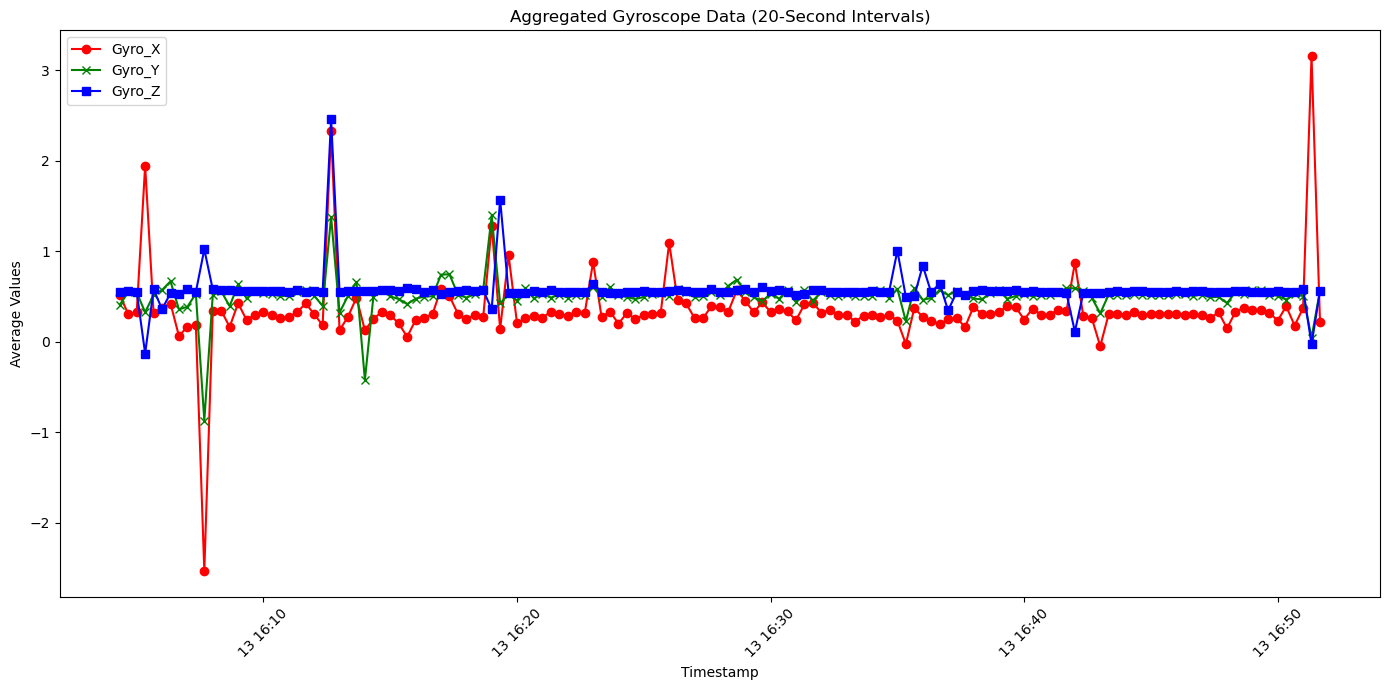

In [52]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Aggregate data to 20-second intervals, calculating the mean for each interval
df_aggregated = df.resample('20S').mean()

plt.figure(figsize=(14, 7))

plt.plot(df_aggregated.index, df_aggregated['Gyro_X'], label='Gyro_X', color='r', linestyle='-', marker='o')
plt.plot(df_aggregated.index, df_aggregated['Gyro_Y'], label='Gyro_Y', color='g', linestyle='-', marker='x')
plt.plot(df_aggregated.index, df_aggregated['Gyro_Z'], label='Gyro_Z', color='b', linestyle='-', marker='s')

# Formatting the plot
plt.xlabel('Timestamp')
plt.ylabel('Average Values')
plt.title('Aggregated Gyroscope Data (20-Second Intervals)')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()  


#### Since the data was recorded every 1 second for an entire hour, the data points are very dense. To make the data more manageable, we resampled it into 20-second intervals and calculated the average for each interval.
#### Despite this averaging, the values of the three gyroscope variables (x, y, and z) appear relatively constant over the hour. However, there were notable fluctuations in the x and z variables, which exhibited sharp decreases followed by significant increases throughout the period.